Progress Check

<Completed>
### Identify 6 strongest predictors of Happiness (done with heatmap)

### Build different Regression Models and check their features
#Done with RF, XGB, NN, tune RF to improve
regularize NN
spot features using RF

### Cluster and see what are the significances
The most distinct Clusters
Cluster 0: Countries w ....
Cluster 1: Countries w ....

### Identify the anomalies 
1. Countries score high on Big 6 but not happy
(Jordan - El Savador) (Peru - Brazil) (Libya - Nepal)
(Anomaly #1 file)
2. Countries that are happy but score low on the big 6
(Anomaly #2 file)

### Geographic Analysis
plotly on GDP (population weighted) - bubble graph
  
  https://blog.datawrapper.de/choroplethmaps/

 <On Going>
   
   
   
   
<References>
 https://www.researchgate.net/post/How_do_I_choose_the_best_clustering_approach 
  https://colab.research.google.com/drive/1f_ZeKb0j6vH8Ymy8bKfKMyioZ8KQBhAh#scrollTo=tqBwtxpngATY
  https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb
  https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [0]:
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [13]:
data2018 = pd.read_excel('WHR2018Chapter2OnlineData.xls')
data2018.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [14]:
print("Data type : ", type(data2018))
print("Data dims : ", data2018.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1562, 19)


In [15]:
data2018.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [17]:
#Explore the dataset
# Information about the Variables
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
country                                                     1562 non-null object
year                                                        1562 non-null int64
Life Ladder                                                 1562 non-null float64
Log GDP per capita                                          1535 non-null float64
Social support                                              1549 non-null float64
Healthy life expectancy at birth                            1553 non-null float64
Freedom to make life choices                                1533 non-null float64
Generosity                                                  1482 non-null float64
Perceptions of corruption                                   1472 non-null float64
Positive affect                                             1544 non-null float64
Negative affect                                             1550 non-null fl

Number of years : 13
2011    146
2014    145
2015    143
2016    142
2012    142
2017    141
2013    137
2010    124
2009    114
2008    110
2007    102
2006     89
2005     27
Name: year, dtype: int64


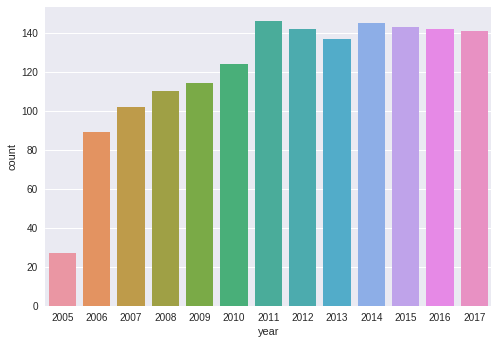

In [27]:
#Number of unique years in the Dataset
print("Number of years :", len(data2018["year"].unique()))

#Number of countries in each year
print(data2018["year"].value_counts())
ax = sb.countplot(x="year", data=data2018)

In [55]:
#Drop the year and country
data2018_drop = data2018.drop("year",axis=1)
data2018_drop = data2018_drop.drop("country",axis=1)
data2018_drop = data2018_drop.fillna(np.mean(data2018_drop))

#Statistical summary of each variables
data2018_drop.describe().round(2)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00,1562.00
mean,5.43,9.22,0.81,62.25,0.73,0.00,0.75,0.71,0.26,0.48,-0.13,0.00,2.00,0.39,0.37,0.39,0.45
std,1.12,1.17,0.12,7.94,0.14,0.16,0.18,0.11,0.08,0.18,0.82,0.93,0.38,0.12,0.05,0.08,0.09
min,2.66,6.38,0.29,37.77,0.26,-0.32,0.04,0.36,0.08,0.07,-2.45,-2.14,0.86,0.13,0.24,0.23,0.22
25%,4.61,8.33,0.75,57.34,0.64,-0.11,0.70,0.62,0.20,0.35,-0.71,-0.67,1.74,0.31,0.37,0.33,0.39
50%,5.33,9.36,0.83,63.76,0.74,-0.01,0.80,0.72,0.25,0.48,-0.13,-0.08,1.96,0.37,0.37,0.39,0.45
75%,6.27,10.17,0.90,68.06,0.84,0.09,0.87,0.80,0.31,0.59,0.50,0.61,2.22,0.45,0.37,0.43,0.48
max,8.02,11.77,0.99,76.54,0.99,0.68,0.98,0.94,0.70,0.99,1.54,2.18,3.53,1.02,0.65,0.63,0.96


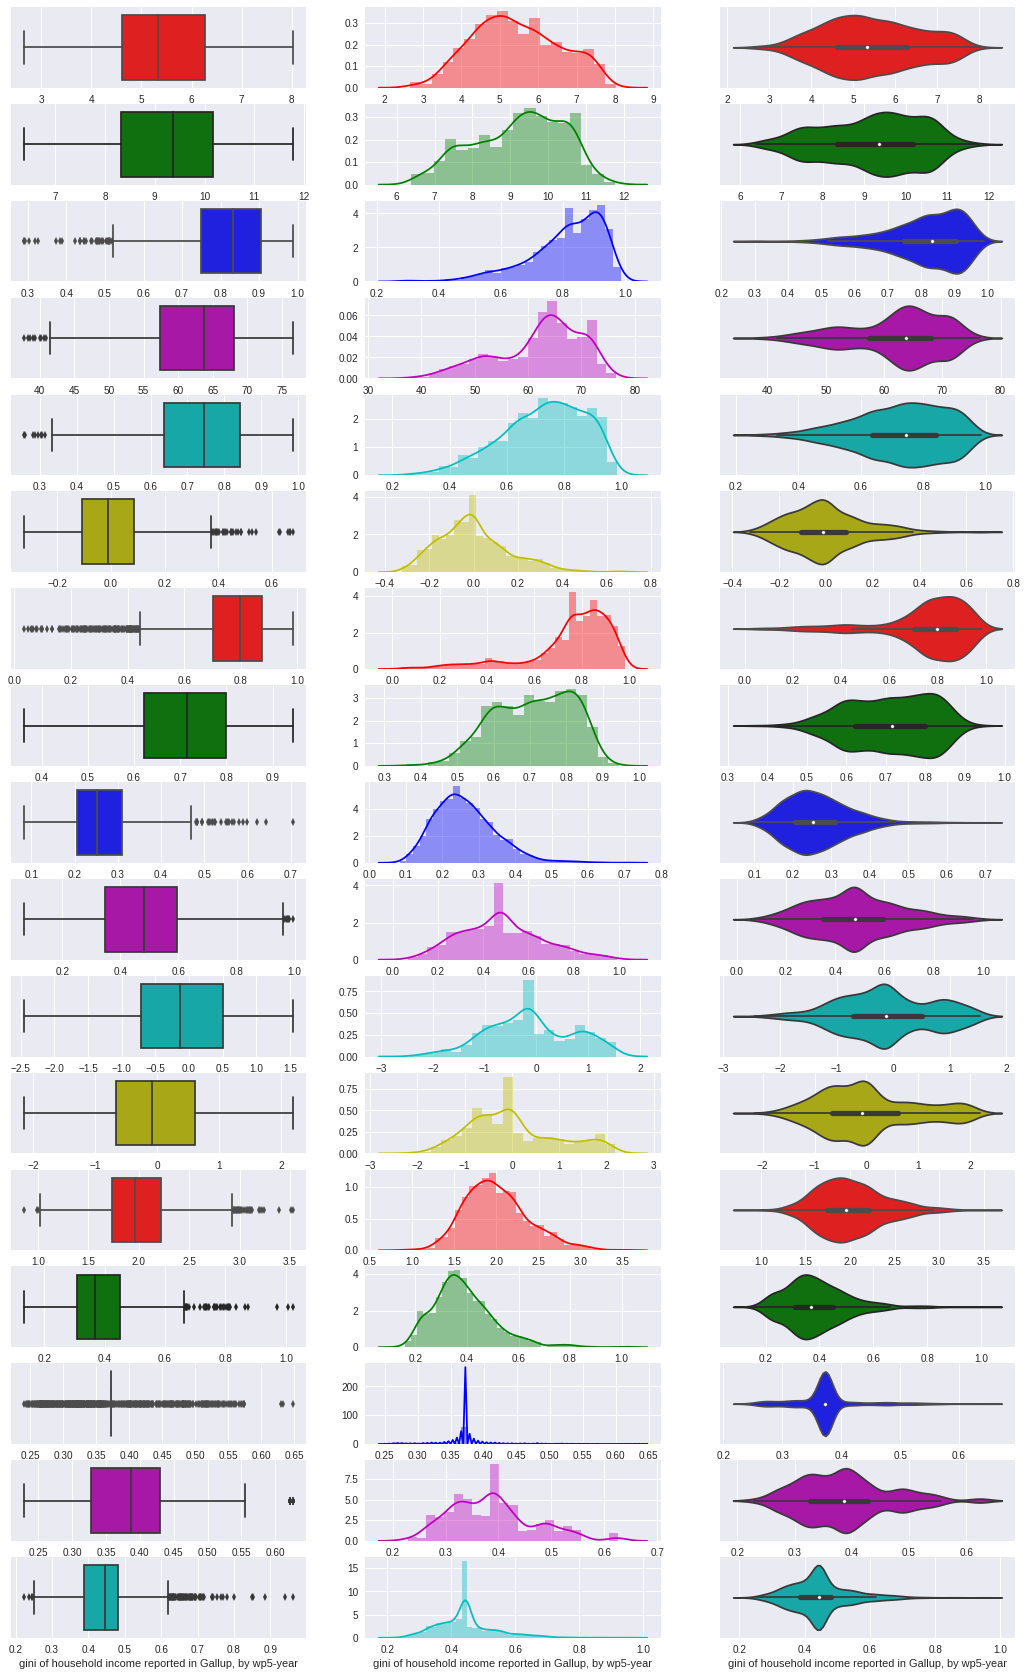

In [61]:
# Draw the distributions of all variables
f, axes = plt.subplots(17, 3, figsize=(18, 30))
colors = ["r", "g", "b", "m", "c", "y","r", "g", "b", "m", "c", "y","r", "g", "b", "m", "c", "y"]

count = 0
for var in data2018_drop:
    sb.boxplot(data2018_drop[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(data2018_drop[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data2018_drop[var], color = colors[count], ax = axes[count,2])
    count += 1

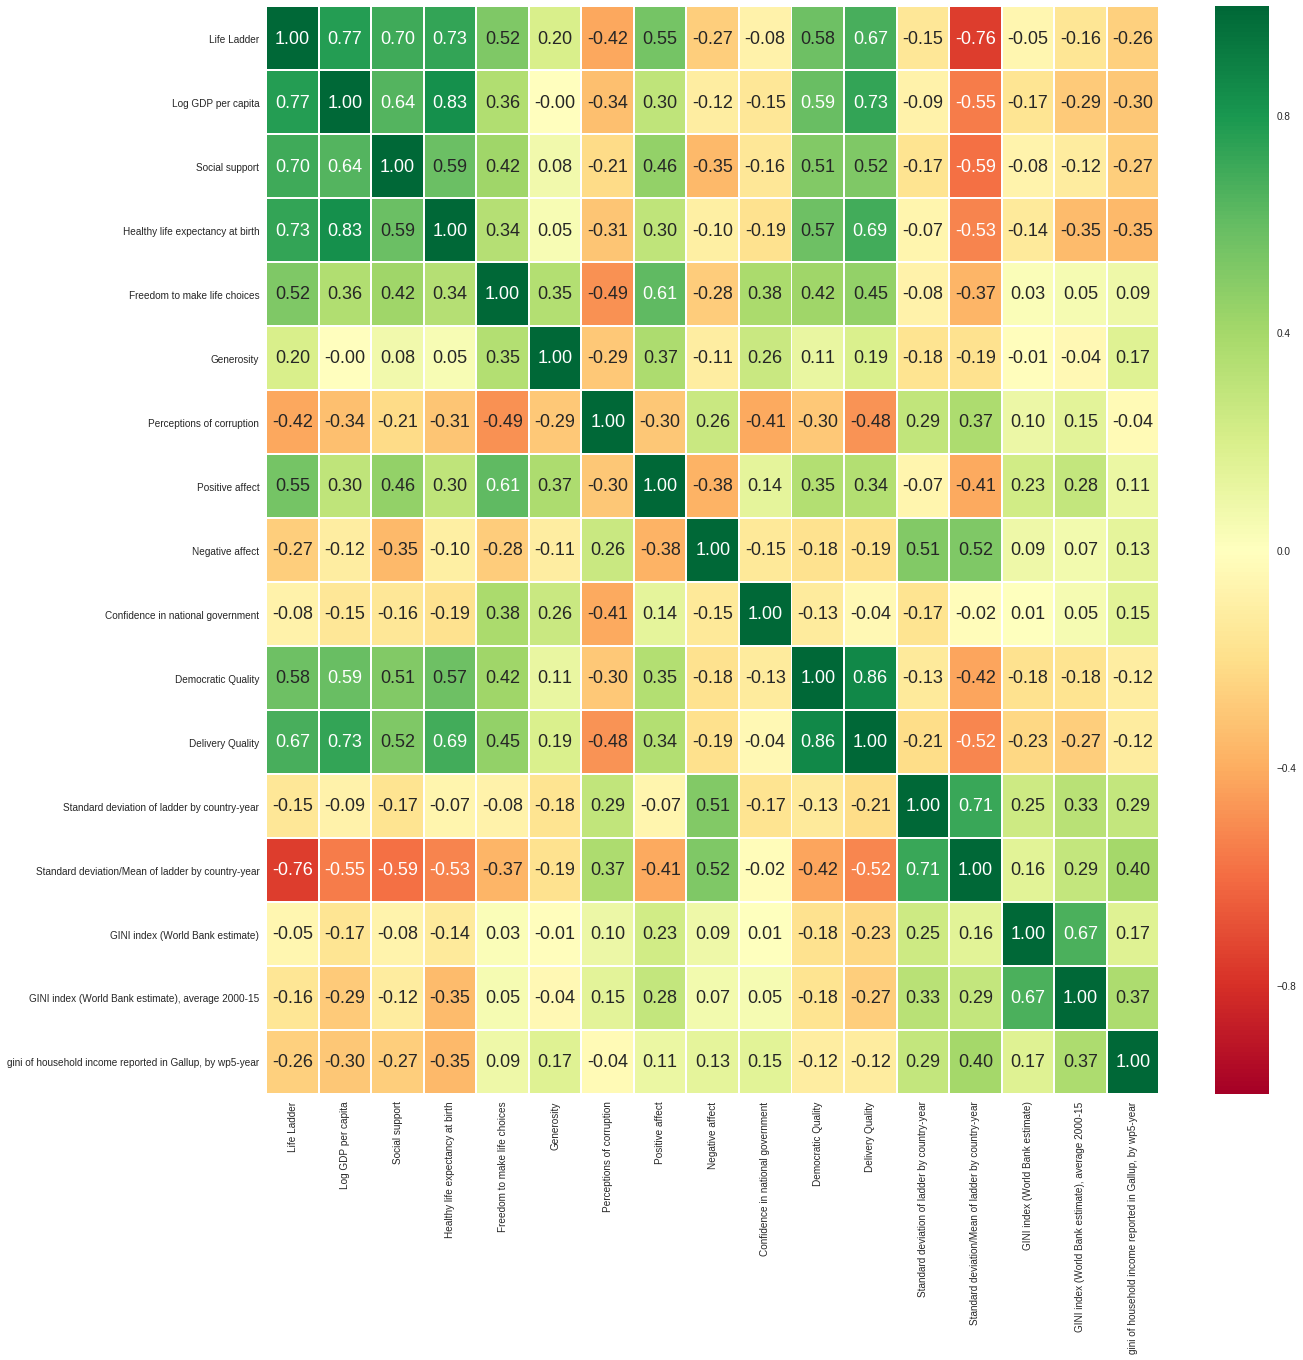

In [69]:
# Correlation Matrix
#print(data2018_drop.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(data2018_drop.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdYlGn")